# CNN Pipeline for Handwritten Digit Classifcation of the MNIST Dataset

**Course:** DVAE26 HT25  
  
**Author** Samuel Lindvall 



## Imports and Environment Setup


In [2]:
# Core
import numpy as np
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch
import torch
from torch import nn
from torch.utils.data import DataLoader

# Torchvision
from torchvision import datasets, transforms

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report


## 1. Problem Definition

The goal of this project is to classify grayscale images of handwritten digits (0–9) using a Convolutional Neural Network (CNN).
Each image has a resolution of 28×28 pixels.

**Input:** 28×28 grayscale image  
  
**Output:** Digit label (0–9) 

## 2. Dataset Overview and Data Quality Analysis

The MNIST dataset consists of 70,000 labeled images of handwritten digits:
- 60,000 training samples
- 10,000 test samples



First step is defining the transform for PyTorch and loading the dataset 

In [ ]:
# Step one is defining a transformation that converts the data into a PyTorch tensor
# The pixel values are normalized between [0,1]

transform = transforms.Compose([
    transforms.ToTensor()
])

# Using the MNIST class in torchvision we load the training dataset 

train_dataset = datasets.MNIST(
    root="data",
    train=True,
    download=False, #Set to true unless kaggle dataset
    transform=transform
)

# Using the MNIST class in torchvision we load the test dataset 
test_dataset = datasets.MNIST(
    root="data",
    train=False,
    download=False, #Set to true unless kaggle dataset
    transform=transform
)

Let's start by examining the data and confirming the datasets sizes

In [ ]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")


image, label = train_dataset[0]
print("Min pixel value:", image.min().item())
print("Max pixel value:", image.max().item())


print("Shape:", image.shape)

Number of training samples: 60000
Number of test samples: 10000
Min pixel value: 0.0
Max pixel value: 1.0
Shape: torch.Size([1, 28, 28])


These are confirmed to be correct with 60000 training samples
and 10000 test samples. 
The pixel values are normalized as expected.
A single image has the shape of [1, 28, 28] where is the channel dimension (1=grayscale) and it's 28x28.

Now let's visualize the data by looking at the first 5 digits of the training set:

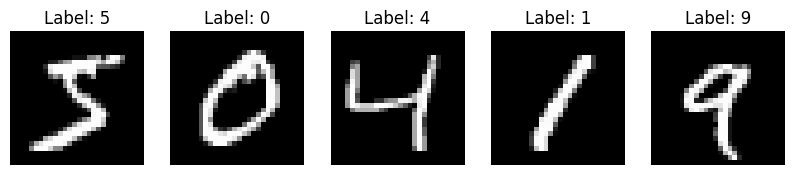

In [ ]:

fig, axes = plt.subplots(1,5, figsize=(10,2))
for i, ax in enumerate(axes):
    image, label = train_dataset[i]
    ax.imshow(image.squeeze(), cmap="gray") #Important to remove the channel dimension for imshow
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.show()

A simple check for missing or invalid values:

In [18]:
def check_missing_or_invalid(dataset, name="Dataset"):
    missing_count = 0
    nan_count = 0
    for i in range(len(dataset)):
        image, label = dataset[i]
        if image is None or label is None:
            missing_count += 1
        if torch.isnan(image).any() or torch.isinf(image).any():
            nan_count += 1
    print(f"{name} -> Missing samples: {missing_count}, NaN/Inf values: {nan_count}")

# Run checks
check_missing_or_invalid(train_dataset, "Training Set")
check_missing_or_invalid(test_dataset, "Test Set")


Training Set -> Missing samples: 0, NaN/Inf values: 0
Test Set -> Missing samples: 0, NaN/Inf values: 0


Let's have a look at the distribution of the dataset to make sure we have a somewhat equal representation of digits:

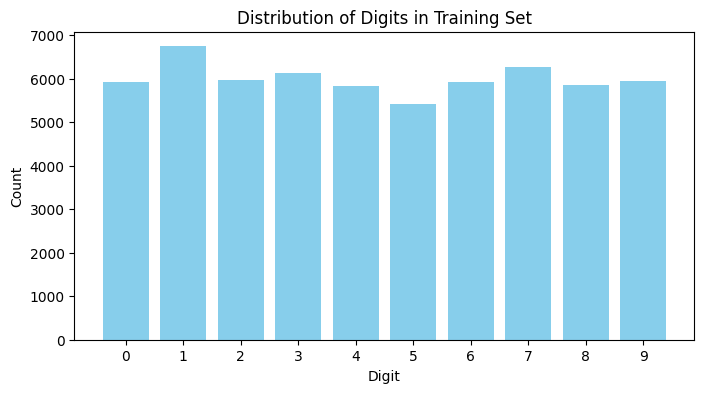

In [14]:
import numpy as np
import matplotlib.pyplot as plt

labels = [label for _, label in train_dataset]
plt.figure(figsize=(8,4))
plt.hist(labels, bins=np.arange(11)-0.5, rwidth=0.8, color="skyblue")
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of Digits in Training Set")
plt.show()


Everything looks clear here, labels and numbers looks as expected and the distribution in more or less equal. 

## 3. Data Preprocessing

## 4. Baseline Model (maybe)

## 5. CNN Architecture

## 6. Model Training

## 7. Model Evaluation

## 8. Error Analysis